11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


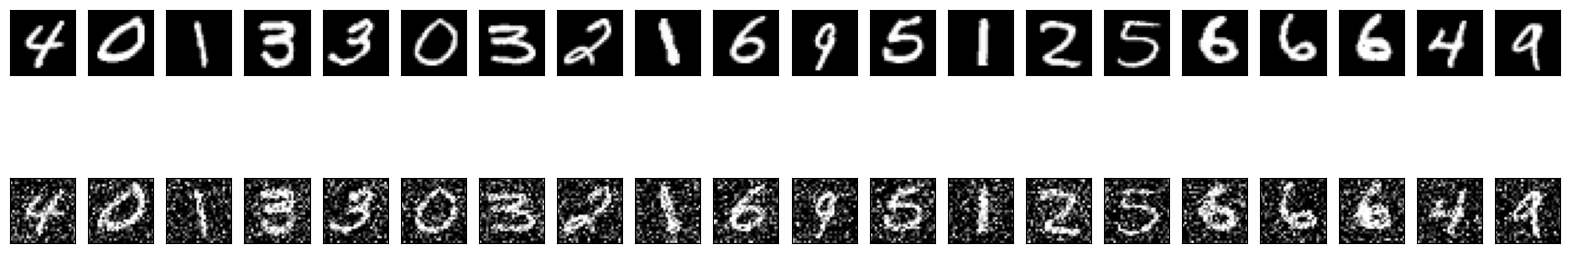

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 14, 14, 32)     │         9,248 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 28, 28, 32)     │         9,248 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,353 (110.75 KB)

 Trainable params: 28,353 (110.75 KB)

 Non-trainable params: 0 (0.00 B)

2024-07-24 22:12:11.563039: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/10


2024-07-24 22:12:12.028059: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


  2/938 ━━━━━━━━━━━━━━━━━━━━ 1:11 76ms/step - loss: 0.6904

2024-07-24 22:12:14.793325: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 17837568 exceeds 10% of free system memory.
2024-07-24 22:12:14.796306: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 24837120 exceeds 10% of free system memory.
2024-07-24 22:12:14.821854: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31610880 exceeds 10% of free system memory.


938/938 ━━━━━━━━━━━━━━━━━━━━ 84s 87ms/step - loss: 0.1802 - val_loss: 0.0695
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 86s 92ms/step - loss: 0.0692 - val_loss: 0.0672
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 78s 83ms/step - loss: 0.0672 - val_loss: 0.0660
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 86s 91ms/step - loss: 0.0662 - val_loss: 0.0653
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 88ms/step - loss: 0.0657 - val_loss: 0.0650
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 86s 91ms/step - loss: 0.0651 - val_loss: 0.0646
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 84s 89ms/step - loss: 0.0648 - val_loss: 0.0642
Epoch 8/10


In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Thu Jun 25 10:10:09 2024

@author: UK
"""
from keras import layers
from keras.datasets import mnist
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt

def preprocessing(array):
    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array

def viewing(array1, array2):
    n = 20
    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

def noise(array):
    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )
    return np.clip(noisy_array, 0.0, 1.0)

(train_data, _), (test_data, _) = mnist.load_data()

train_data = preprocessing(train_data)
test_data = preprocessing(test_data)

noisy_train_data = noise(train_data)
noisy_test_data = noise(test_data)

viewing(train_data, noisy_train_data)

input = layers.Input(shape=(28, 28, 1))

#Kodlayıcı (Encoder)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

#Kod Çözücü (Decoder)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

#Orijinal veriyle eğitim
autoencoder.fit(
    x=train_data,
    y=train_data,
    epochs=10,
    batch_size=64,
    shuffle=True,
    validation_data=(test_data, test_data),)

predictions = autoencoder.predict(test_data)
viewing(test_data, predictions)

#Gürültülü veriyle eğitim
autoencoder.fit(
    x=noisy_train_data,
    y=train_data,
    epochs=10,
    batch_size=128,
    shuffle=True,
    validation_data=(noisy_test_data, test_data),
)

predicted = autoencoder.predict(noisy_test_data)
viewing(noisy_test_data, predicted)
